In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

In [3]:
df=pd.read_csv("/content/drive/MyDrive/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [4]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 
import sklearn.metrics  
def RMSE(pred,org):
    value=np.sqrt(sklearn.metrics.mean_squared_error(org, pred)  )
    return value

In [5]:
train=df.iloc[:1501,:]
test=df.iloc[1501:,:]


In [6]:
arima_model_1=ARIMA(train.Close, order=(1,1,1)).fit()
train_pred_1 = arima_model_1.predict(start = train.index[0],end = train.index[-1])
test_pred_1 = arima_model_1.predict(start = test.index[0],end = test.index[-1])

print("Test MAPE :",MAPE(test_pred_1,test.Close))
print('Test RMSE:' ,RMSE(test_pred_1,test.Close))

Test MAPE : 12.247791563807542
Test RMSE: 36.68446200032897


In [7]:
arima_model_2=ARIMA(train.Close, order=(0,2,1)).fit()
train_pred_2 = arima_model_2.predict(start = train.index[0],end = train.index[-1])
test_pred_2 = arima_model_2.predict(start = test.index[0],end = test.index[-1])

print("Test MAPE :",MAPE(test_pred_2,test.Close))
print('Test RMSE:' ,RMSE(test_pred_2,test.Close))

Test MAPE : 9.34725990653826
Test RMSE: 23.66414108777809


In [8]:
arima_model_3=ARIMA(train.Close, order=(1,1,0)).fit()
train_pred_3 = arima_model_3.predict(start = train.index[0],end = train.index[-1])
test_pred_3 = arima_model_3.predict(start = test.index[0],end = test.index[-1])

print("Test MAPE :",MAPE(test_pred_3,test.Close))
print('Test RMSE:' ,RMSE(test_pred_3,test.Close))

Test MAPE : 12.243284655749807
Test RMSE: 36.67041346084563


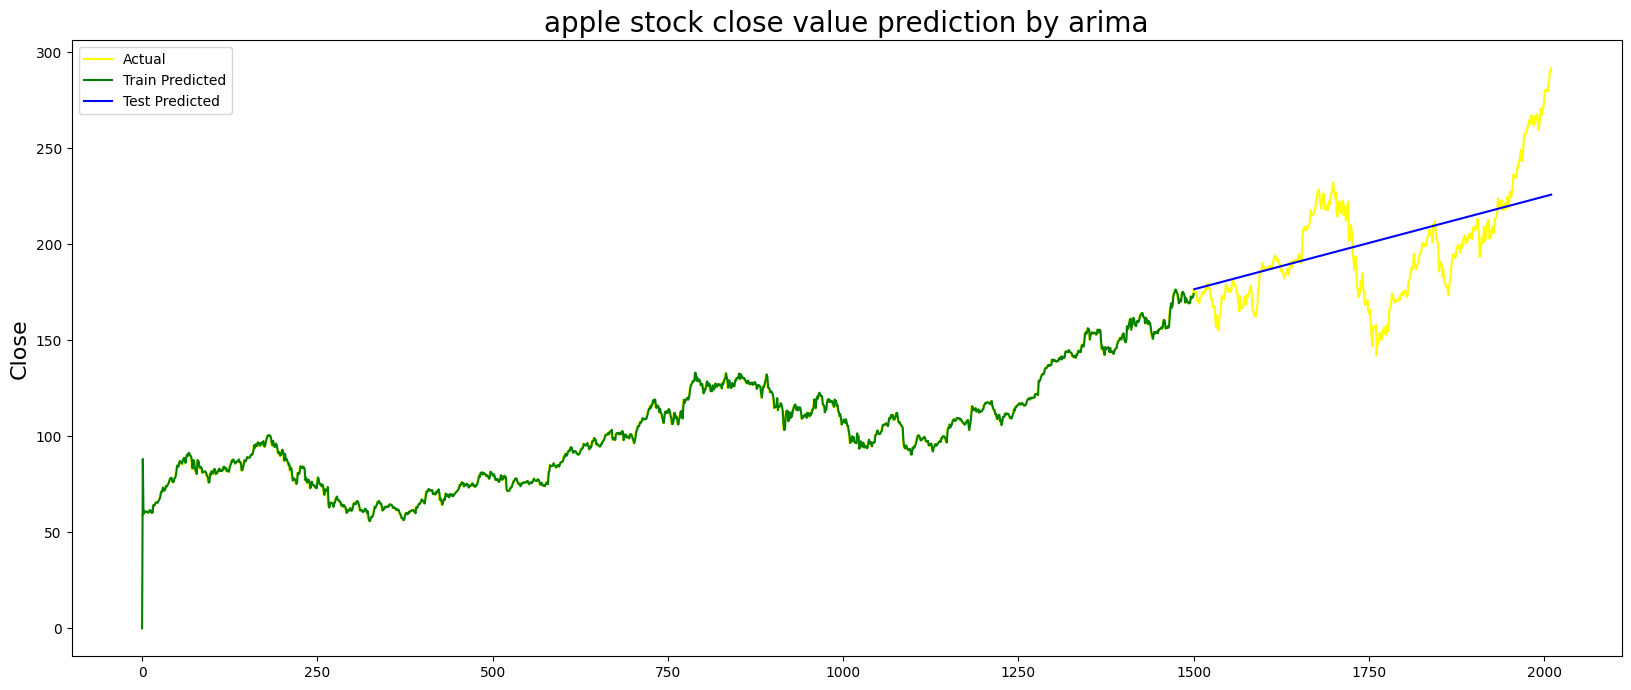

In [9]:
plt.figure(figsize=(20,8))
plt.plot(df.Close, color='yellow',label="Actual")
plt.plot(train_pred_2, color='green',label="Train Predicted")
plt.plot(test_pred_2, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by arima', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()